# Are there more or less bus stops in neighborhoods with below average income?



## Hypothesis Foundation
https://www.census.gov/newsroom/blogs/research-matters/2015/12/in-what-ways-are-d-c-area-neighborhoods-with-rail-transit-different-from-other-neighborhoods.html
https://www.urban.org/features/unequal-commute

Objective: Compare bustops in neighboords with below average income vs above average income

### Hypothesis 0: Below average income neighboords have fewer bus stops compare to above average incomes

### Hypothesis 1: Below average income neighboords have more or equal bus stops compare to above average incomes


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

dc_metro = gpd.read_file('https://opendata.arcgis.com/datasets/e85b5321a5a84ff9af56fd614dab81b3_53.geojson')
#https://opendata.dc.gov/datasets/DCGIS::metro-bus-stops/about

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
dc_metro.head(2) 

,EGIS_ID,REG_ID,BSTP_GEO_ID,BSTP_OPS_TCD,BSTP_EFF_DATE,BSTP_TCD,AT_STR,ON_STR,BSTP_HDG,BSTP_POS_TCD,...,BSTP_LAT,GIS_ID,SE_ANNO_CAD_DATA,OBJECTID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED,geometry
0,1310679,3003039,14837,PRS,2001-11-14T00:00:00+00:00,UNK,LIGHT RAIL STATION,BWI AIRPORT,87,MID,...,39.191491,BusStopPt_581,None,1,{FD3DB5B2-FF05-482C-AF82-98B2727951C6},None,None,None,None,POINT (-76.67303 39.19150)
1,1310678,3003038,14836,PRS,2001-11-14T00:00:00+00:00,UNK,CONCOURSE E,BWI AIRPORT,326,MID,...,39.181321,BusStopPt_836,None,2,{E6533895-2DBD-41F0-96F7-AB25E02AC18F},None,None,None,None,POINT (-76.66894 39.18133)


In [5]:
dc_metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
dc_metro.columns

Index(['EGIS_ID', 'REG_ID', 'BSTP_GEO_ID', 'BSTP_OPS_TCD', 'BSTP_EFF_DATE',
       'BSTP_TCD', 'AT_STR', 'ON_STR', 'BSTP_HDG', 'BSTP_POS_TCD', 'BSTP_LDC',
       'BSTP_MSG_TEXT', 'BSTP_LAT_LON_TCD', 'BSTP_INV_SYR_TCD',
       'BSTP_INV_SRV_DATE', 'BSTP_BNH_CNT', 'BSTP_BST_TCD', 'BSTP_IFC_OWN',
       'BSTP_HAS_BKRS', 'BSTP_HAS_PRS', 'BSTP_HAS_PVM', 'BSTP_HAS_PRM',
       'BSTP_PDP_SIZE_TCD', 'BSTP_PDP_MTR_TCD', 'BSTP_PDP_OBS_TCD',
       'BSTP_PDP_HAS_CCN', 'BSTP_HAS_BDR_PDP', 'BSTP_BDR_PDP_OBS',
       'BSTP_SWK_WDT', 'BSTP_SWK_HAS_CCN', 'BSTP_SWK_HAS_PPC',
       'BSTP_SWK_SLP_WVL', 'BSTP_SWK_OBS_TCD', 'BSTP_SWK_IPD_TCD',
       'ONS_CRP_SLP', 'ONS_CRP', 'OFS_CRP', 'AT_STR_ABS_CRP', 'AT_STR_OSS_CRP',
       'ONS_CWK', 'OFS_CWK', 'AT_STR_ABS_CWK', 'AT_STR_OSS_CWK',
       'ON_STR_STS_OR_TFL', 'ON_STR_PDC_SGL', 'AT_STR_PDC_SGL',
       'BSTP_PRK_RST_TCD', 'BSTP_NPK_ZNE_LTH', 'CNF_NPK_SNS',
       'STR_LGT_WTN_30_FT', 'BSTP_HAS_LED_DSP', 'BSTP_ACC_RATING',
       'BSTP_BRDG_STP', 'BSTP_

In [7]:
! pip install lxml

In [8]:
#B06010
#https://www.census.gov/data/developers/data-sets/acs-5year.2017.html

import pandas as pd 


variables = pd.read_html('https://api.census.gov/data/2017/acs/acs1/groups/B06010.html',header=0)


In [9]:
variables = variables[0]
display(variables)

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,B06010_001E,Estimate!!Total,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
1,B06010_001EA,Annotation of Estimate!!Total,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,string,B06010,NaN
2,B06010_001M,Margin of Error!!Total,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
3,B06010_001MA,Annotation of Margin of Error!!Total,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,string,B06010,NaN
4,B06010_002E,Estimate!!Total!!No income,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
...,...,...,...,...,...,...,...,...,...
216,B06010_055E,Estimate!!Total!!Foreign born!!With income!!$7...,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
217,B06010_055EA,Annotation of Estimate!!Total!!Foreign born!!W...,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,string,B06010,NaN
218,B06010_055M,Margin of Error!!Total!!Foreign born!!With inc...,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
219,B06010_055MA,Annotation of Margin of Error!!Total!!Foreign ...,PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,string,B06010,NaN


In [10]:
variables[variables['Label'].str.contains(pat='Estimate!!Total!!With income!!')].to_csv('./data/variables.csv')
v = variables[variables['Label'].str.contains(pat='Estimate!!Total!!With income!!')]

In [11]:
#v['Name'].unique()

In [12]:
v[['Name','Label']]

,Name,Label
12,B06010_004E,"Estimate!!Total!!With income!!$1 to $9,999 or ..."
13,B06010_004EA,Annotation of Estimate!!Total!!With income!!$1...
16,B06010_005E,"Estimate!!Total!!With income!!$10,000 to $14,999"
17,B06010_005EA,Annotation of Estimate!!Total!!With income!!$1...
20,B06010_006E,"Estimate!!Total!!With income!!$15,000 to $24,999"
21,B06010_006EA,Annotation of Estimate!!Total!!With income!!$1...
24,B06010_007E,"Estimate!!Total!!With income!!$25,000 to $34,999"
25,B06010_007EA,Annotation of Estimate!!Total!!With income!!$2...
28,B06010_008E,"Estimate!!Total!!With income!!$35,000 to $49,999"
29,B06010_008EA,Annotation of Estimate!!Total!!With income!!$3...


In [13]:
data = {'Variable name': ['Bus Stops'],
            'Variable URL': ['https://opendata.dc.gov/datasets/DCGIS::metro-bus-stops/about']}

df = pd.DataFrame(data)
df

,Variable name,Variable URL
0,Bus Stops,https://opendata.dc.gov/datasets/DCGIS::metro-...


In [ ]:

! wget https://www2.census.gov/geo/tiger/TIGER2017/TRACT/tl_2017_11_tract.zip
! unzip tl_2017_11_tract.zip

In [14]:
! pip install census us

In [15]:
#import census function called Census and import states from us module
from census import Census
from us import states


In [16]:
session = Census("44a334f9af4afbea6ad0aab691a4e6fe96bd61d1")

In [17]:
rent_vars = ['B06010_004E', 'B06010_005E',
       'B06010_006E', 'B06010_007E',
       'B06010_008E', 'B06010_009E', 
       'B06010_010E', 'B06010_011E']

In [18]:
# use session to download variables based on their name, geography and year
dc_census = session.acs5.state_county_tract(fields = ('NAME', *rent_vars ),
                                      state_fips = states.DC.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2017)

In [19]:
# convert the data into a dataframe and view head()
print(type(dc_census))
dc_df = pd.DataFrame(dc_census)
dc_df.head(2)

<class 'list'>


,NAME,B06010_004E,B06010_005E,B06010_006E,B06010_007E,B06010_008E,B06010_009E,B06010_010E,B06010_011E,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",646.0,203.0,534.0,454.0,485.0,404.0,392.0,928.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",394.0,137.0,254.0,287.0,400.0,278.0,125.0,427.0,11,001,002202


In [20]:
# create binary query to match variable names
name_match = variables["Name"].str.match( pat='|'.join(rent_vars))

In [21]:
# Isolate the data
variable_names =  variables[name_match]

In [22]:
name_match = variables["Name"].str.match( pat='$|'.join(rent_vars))
variable_names =  variables[name_match]
variable_names.head(2)

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
12,B06010_004E,"Estimate!!Total!!With income!!$1 to $9,999 or ...",PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN
16,B06010_005E,"Estimate!!Total!!With income!!$10,000 to $14,999",PLACE OF BIRTH BY INDIVIDUAL INCOME IN THE PAS...,predicate-only,NaN,0,int,B06010,NaN


In [23]:
# ^^^ AVERAGE INCOME IN DC APROX 50K, below im dividing the Name in Above vs Below

In [24]:
variable_dict= {'B06010_004E':'Below_average_income', 'B06010_005E':'Below_average_income',
       'B06010_006E':'Below_average_income', 'B06010_007E':'Below_average_income', 
       'B06010_008E':'Below_average_income',  'B06010_009E':'Above_average_income',
       'B06010_010E':'Above_average_income',  'B06010_011E':'Above_average_income'}

In [25]:
dc_df.rename(columns=variable_dict, inplace=True)
dc_df.head(2)

,NAME,Below_average_income,Below_average_income,Below_average_income,Below_average_income,Below_average_income,Above_average_income,Above_average_income,Above_average_income,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",646.0,203.0,534.0,454.0,485.0,404.0,392.0,928.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",394.0,137.0,254.0,287.0,400.0,278.0,125.0,427.0,11,001,002202


### Reprojection
- Reprojecting to a relevant projection 
- Cleaning up 
- Removing unneeded variables and rename useful ones 




In [26]:
dc_metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
data = {'CRS Commo Name': ['WGS 84'],
            'ESPG': [' EPSG:4326'],
       'proj4 string': ['+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs']}
df = pd.DataFrame(data)
df

,CRS Commo Name,ESPG,proj4 string
0,WGS 84,EPSG:4326,+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs


In [28]:
# Start your analysis here:
#to cr
dc_metro.to_crs('EPSG:32618', inplace =True) #maybe to early to reproject


In [29]:
type(dc_metro)

geopandas.geodataframe.GeoDataFrame

In [30]:
dc_metro.drop(columns = ['BSTP_HDG',
       'BSTP_POS_TCD', 'BSTP_LDC', 'BSTP_MSG_TEXT', 'BSTP_LAT_LON_TCD',
       'BSTP_INV_SYR_TCD', 'BSTP_INV_SRV_DATE', 'BSTP_BNH_CNT', 'BSTP_BST_TCD',
       'BSTP_IFC_OWN', 'BSTP_HAS_BKRS', 'BSTP_HAS_PRS', 'BSTP_HAS_PVM',
       'BSTP_HAS_PRM', 'BSTP_PDP_SIZE_TCD', 'BSTP_PDP_MTR_TCD',
       'BSTP_PDP_OBS_TCD', 'BSTP_PDP_HAS_CCN', 'BSTP_HAS_BDR_PDP',
       'BSTP_BDR_PDP_OBS', 'BSTP_SWK_WDT', 'BSTP_SWK_HAS_CCN',
       'BSTP_SWK_HAS_PPC', 'BSTP_SWK_SLP_WVL', 'BSTP_SWK_OBS_TCD',
       'BSTP_SWK_IPD_TCD', 'ONS_CRP_SLP', 'ONS_CRP', 'OFS_CRP',
       'AT_STR_ABS_CRP', 'AT_STR_OSS_CRP', 'ONS_CWK', 'OFS_CWK',
       'AT_STR_ABS_CWK', 'AT_STR_OSS_CWK', 'ON_STR_STS_OR_TFL',
       'ON_STR_PDC_SGL', 'AT_STR_PDC_SGL', 'BSTP_PRK_RST_TCD',
       'BSTP_NPK_ZNE_LTH', 'CNF_NPK_SNS', 'STR_LGT_WTN_30_FT',
       'BSTP_HAS_LED_DSP', 'BSTP_ACC_RATING', 'BSTP_BRDG_STP',
       'BSTP_HAS_LUM_SIGN', 'BSTP_HAS_PWR_SRC', 'METRO_ACCS_STP', 'BSTP_LON',
       'BSTP_LAT'], inplace = True)

In [31]:
dc_metro.drop(columns = ['CREATOR',
       'CREATED', 'EDITOR', 'EDITED','SE_ANNO_CAD_DATA','BSTP_EFF_DATE'], inplace = True)

In [32]:
dc_metro.drop(columns = ['OBJECTID'], inplace= True)

In [33]:
dc_metro.head(2)

,EGIS_ID,REG_ID,BSTP_GEO_ID,BSTP_OPS_TCD,BSTP_TCD,AT_STR,ON_STR,GIS_ID,GLOBALID,geometry
0,1310679,3003039,14837,PRS,UNK,LIGHT RAIL STATION,BWI AIRPORT,BusStopPt_581,{FD3DB5B2-FF05-482C-AF82-98B2727951C6},POINT (355516.778 4339360.965)
1,1310678,3003038,14836,PRS,UNK,CONCOURSE E,BWI AIRPORT,BusStopPt_836,{E6533895-2DBD-41F0-96F7-AB25E02AC18F},POINT (355849.146 4338225.745)


In [34]:
dc_df.head(2)

,NAME,Below_average_income,Below_average_income,Below_average_income,Below_average_income,Below_average_income,Above_average_income,Above_average_income,Above_average_income,state,county,tract
0,"Census Tract 21.02, District of Columbia, Dist...",646.0,203.0,534.0,454.0,485.0,404.0,392.0,928.0,11,001,002102
1,"Census Tract 22.02, District of Columbia, Dist...",394.0,137.0,254.0,287.0,400.0,278.0,125.0,427.0,11,001,002202


### Linking Files
- Linking census data to tiger shapefiles 
- Creating new variables percentages 
- Joining census and DC Open Data variables using overlays 


In [35]:
# create a new copy of data of interest. 
dc_df = dc_df.copy()

In [36]:
# Create variable GEOID 
dc_df.loc[:,"GEOID"] = dc_df["state"] + dc_df["county"] + dc_df["tract"]
#dc_df["GEOID"] 

In [37]:
# LOOK AT THE LECTURE AND THE 
# CENSUS POLYGON DATA
#import geopandas as gpd
dc_shp = gpd.read_file('data/tl_2017_11_tract.shp')
dc_shp.head(2)
# JOIN THIS CENSUS DATA TO YOUR CENSUS DATA 

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2379832,2936613,+38.8132450,-077.0238468,"POLYGON ((-77.03919 38.80050, -77.03913 38.800..."
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2744444,83,+38.8499425,-077.0004103,"POLYGON ((-77.00919 38.83918, -77.00915 38.839..."


In [38]:
dc_join = dc_shp.merge(right=dc_df, how='left',on='GEOID', validate='one_to_one')
dc_join.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Below_average_income,Below_average_income,Below_average_income,Below_average_income,Above_average_income,Above_average_income,Above_average_income,state,county,tract
0,11,001,010900,11001010900,109,Census Tract 109,G5020,S,2379832,2936613,...,367.0,197.0,219.0,348.0,203.0,21.0,115.0,11,001,010900
1,11,001,010400,11001010400,104,Census Tract 104,G5020,S,2744444,83,...,255.0,322.0,371.0,502.0,188.0,81.0,200.0,11,001,010400
2,11,001,009903,11001009903,99.03,Census Tract 99.03,G5020,S,383679,0,...,109.0,222.0,140.0,84.0,162.0,114.0,221.0,11,001,009903
3,11,001,009904,11001009904,99.04,Census Tract 99.04,G5020,S,426198,0,...,108.0,251.0,215.0,223.0,160.0,24.0,200.0,11,001,009904
4,11,001,009905,11001009905,99.05,Census Tract 99.05,G5020,S,431557,0,...,169.0,238.0,203.0,271.0,229.0,30.0,189.0,11,001,009905


In [39]:
dc_join.drop(columns = ['STATEFP', 'COUNTYFP', 'TRACTCE','NAME_x','NAMELSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'], inplace = True)

In [40]:
dc_join['Total_Below_average_income'] = dc_join.iloc[:,3:8].sum(axis = 1)

In [41]:
dc_join['Total_Above_average_income'] = dc_join.iloc[:,8:11].sum(axis = 1)

In [42]:
dc_join.drop(['Below_average_income','Above_average_income'], axis = 1, inplace = True)

In [43]:
dc_join.to_crs('EPSG:32618', inplace =True) #maybe to early to reproject

In [44]:
dc_join.head(2)

,GEOID,geometry,NAME_y,state,county,tract,Total_Below_average_income,Total_Above_average_income
0,11001010900,"POLYGON ((322919.967 4296612.825, 322926.059 4...","Census Tract 109, District of Columbia, Distri...",11,001,010900,2392.0,339.0
1,11001010400,"POLYGON ((325619.776 4300848.811, 325623.827 4...","Census Tract 104, District of Columbia, Distri...",11,001,010400,2328.0,469.0


In [45]:
! pip install mapclassify
! pip install contextily
# import modules for mapping
import numpy as np 
import matplotlib.pyplot as plt 
import contextily as cx 


In [46]:

dc_join['Percentage']  = ((dc_join['Total_Above_average_income'] - dc_join['Total_Below_average_income'])/(dc_join['Total_Below_average_income'] + dc_join['Total_Above_average_income']))*100

In [47]:
dc_join.head(2)

,GEOID,geometry,NAME_y,state,county,tract,Total_Below_average_income,Total_Above_average_income,Percentage
0,11001010900,"POLYGON ((322919.967 4296612.825, 322926.059 4...","Census Tract 109, District of Columbia, Distri...",11,001,010900,2392.0,339.0,-75.173929
1,11001010400,"POLYGON ((325619.776 4300848.811, 325623.827 4...","Census Tract 104, District of Columbia, Distri...",11,001,010400,2328.0,469.0,-66.464069


### Maps
- Creating a map 


<AxesSubplot:>

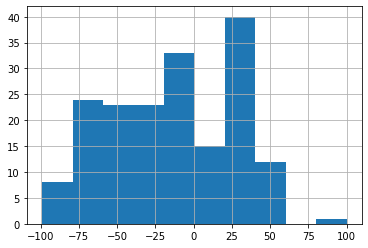

In [48]:
dc_join['Percentage'].hist()

In [49]:
# spatial join intersection 
metro_counts = gpd.sjoin(dc_metro,
                          dc_join,
                           how = 'inner')
metro_counts.head(2)

,EGIS_ID,REG_ID,BSTP_GEO_ID,BSTP_OPS_TCD,BSTP_TCD,AT_STR,ON_STR,GIS_ID,GLOBALID,geometry,index_right,GEOID,NAME_y,state,county,tract,Total_Below_average_income,Total_Above_average_income,Percentage
1569,1308410,1003415,15231,PRS,REV,EASTERN AVE,16TH ST NW,BusStopPt_4871,{EB214A63-80A0-4E17-9A27-3FCAD8842574},POINT (323658.307 4317828.500),73,11001001600,"Census Tract 16, District of Columbia, Distric...",11,001,001600,1195.0,2077.0,26.95599
1572,1308549,1002883,11786,PRS,REV,16TH ST NW,EASTERN AVE NW,BusStopPt_1612,{CCD2D6C0-094F-4B3F-B351-15F3B4339DCC},POINT (323690.148 4317818.572),73,11001001600,"Census Tract 16, District of Columbia, Distric...",11,001,001600,1195.0,2077.0,26.95599


In [50]:
metro_counts['count_bus'] = 1
data_final = metro_counts.groupby('GEOID').sum()


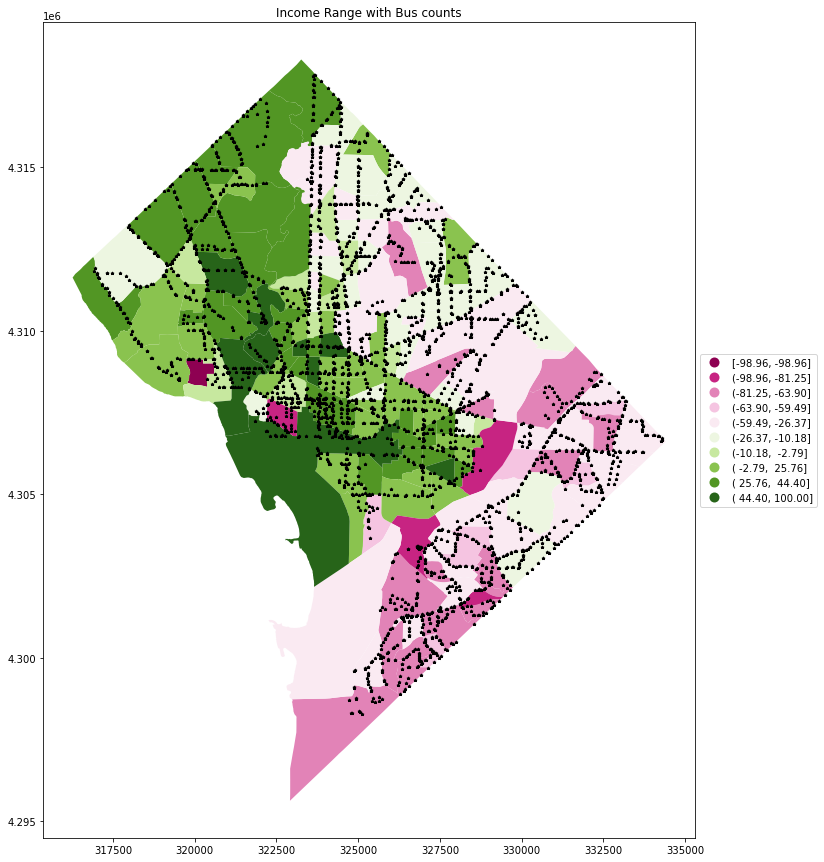

In [51]:
fig, ax = plt.subplots(figsize=(15, 15))  # Create a figure containing a single axes.
ax.set_title("Income Range with Bus counts")  # Add a title to the axes.
dc_join.plot(ax=ax, column='Percentage', scheme='fisherjenkssampled', k=10, \
             
             cmap='PiYG', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),'interval': True},
          )
metro_counts.plot(ax=ax, color ='black', markersize= 8, marker = '*')
plt.show()

### Plots
- Creating a plot to prove my hypothesis


In [52]:
# Start your analysis here:
data_final.head(2)


,EGIS_ID,REG_ID,BSTP_GEO_ID,index_right,Total_Below_average_income,Total_Above_average_income,Percentage,count_bus
GEOID,,,,,,,,
11001000100,45764914,35052054,286248,4060,36365.0,109095.0,1750.000000,35
11001000201,6531024,5007574,44743,275,14355.0,75.0,-494.802495,5


In [53]:
# the criteria is simple if the number is negative it means there are more people with above average income and if it
# is positive there are more people with below
data_final['Division'] =  data_final['Percentage'].apply(lambda x : 'Above' if  x > 0 else 'Below')

In [54]:
data_final.head(2)

,EGIS_ID,REG_ID,BSTP_GEO_ID,index_right,Total_Below_average_income,Total_Above_average_income,Percentage,count_bus,Division
GEOID,,,,,,,,,
11001000100,45764914,35052054,286248,4060,36365.0,109095.0,1750.000000,35,Above
11001000201,6531024,5007574,44743,275,14355.0,75.0,-494.802495,5,Below


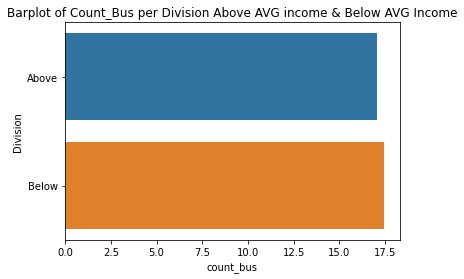

In [55]:
import seaborn as sns 

sns.barplot(data = data_final, y ='Division',x ='count_bus', ci = None)
plt.title('Barplot of Count_Bus per Division Above AVG income & Below AVG Income')
plt.show()

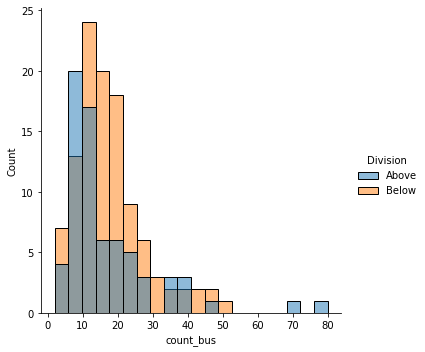

In [56]:
sns.displot(data_final, x = 'count_bus', hue = 'Division')

# Result
This Barplot shows how the Below avg income have more average buses.
stopes compare to the Above avg income, in the histogram the distribution of buses i really similar. 
now we can reject our null hypothesis

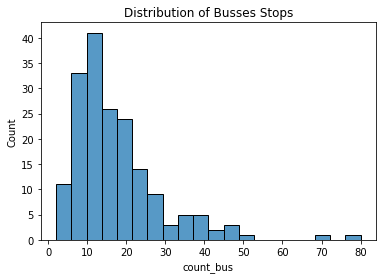

In [57]:
sns.histplot(data= data_final, x ='count_bus')
plt.title('Distribution of Busses Stops')
plt.show()

### Analysis using Quadrants

- Using overlay functions to add quadrants (NE,SE,NW,SW) to your data


In [58]:
def plot_overlay(overlay_type, overlay_result,column=None):
    '''Plot the overlay result on a map and add the outlines of the original shapefiles on top.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    if column is None:
        column = overlay_result.index.values
    # Plot overlay data
    overlay_result.to_crs('epsg:4326').plot(ax = ax, column=column,cmap = 'Set2', edgecolor = 'black')

    # Plot outlines of original shapefiles
    #income.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
    quad.plot(ax = ax, color = 'none', edgecolor = 'dodgerblue')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('Overlay Results: {0}'.format(overlay_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [59]:
# Start your analysis here:
quad = gpd.read_file('https://opendata.arcgis.com/datasets/02923e4697804406b9ee3268a160db99_11.geojson')
quad  = quad[['QUADRANT','geometry']]


In [60]:
dc_join.crs

<Derived Projected CRS: EPSG:32618>
Name: WGS 84 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, northern hemisphere between equator and 84°N, onshore and offshore. Bahamas. Canada - Nunavut; Ontario; Quebec. Colombia. Cuba. Ecuador. Greenland. Haiti. Jamica. Panama. Turks and Caicos Islands. United States (USA). Venezuela.
- bounds: (-78.0, 0.0, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
quad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
quad.head()

,QUADRANT,geometry
0,NW,"POLYGON ((-77.00859 38.94632, -77.00852 38.946..."
1,NE,"POLYGON ((-76.97755 38.94646, -76.97838 38.947..."
2,SW,"POLYGON ((-77.00907 38.88981, -77.00907 38.889..."
3,SE,"POLYGON ((-77.00544 38.88982, -77.00578 38.889..."


In [63]:
sector_squad = gpd.overlay(metro_counts, quad.to_crs('EPSG:32618'), how ='identity')
sector_squad.head(2)

,EGIS_ID,REG_ID,BSTP_GEO_ID,BSTP_OPS_TCD,BSTP_TCD,AT_STR,ON_STR,GIS_ID,GLOBALID,index_right,...,NAME_y,state,county,tract,Total_Below_average_income,Total_Above_average_income,Percentage,count_bus,QUADRANT,geometry
0,1308410.0,1003415.0,15231.0,PRS,REV,EASTERN AVE,16TH ST NW,BusStopPt_4871,{EB214A63-80A0-4E17-9A27-3FCAD8842574},73.0,...,"Census Tract 16, District of Columbia, Distric...",11,001,001600,1195.0,2077.0,26.95599,1.0,NW,POINT (323658.307 4317828.500)
1,1308549.0,1002883.0,11786.0,PRS,REV,16TH ST NW,EASTERN AVE NW,BusStopPt_1612,{CCD2D6C0-094F-4B3F-B351-15F3B4339DCC},73.0,...,"Census Tract 16, District of Columbia, Distric...",11,001,001600,1195.0,2077.0,26.95599,1.0,NW,POINT (323690.148 4317818.572)


In [64]:
quadrants = sector_squad.groupby('QUADRANT').sum('count_bus')
sector_squad.groupby('QUADRANT').sum('count_bus')

,EGIS_ID,REG_ID,BSTP_GEO_ID,index_right,Total_Below_average_income,Total_Above_average_income,Percentage,count_bus
QUADRANT,,,,,,,,
NE,1.059419e+09,8.156664e+08,8772972.0,83018.0,1385768.0,858671.0,-19628.389603,810.0
NW,1.874712e+09,1.439138e+09,16063814.0,145394.0,2159301.0,2606734.0,17848.733987,1433.0
SE,9.477495e+08,7.247550e+08,5109133.0,57001.0,1222532.0,442057.0,-35172.514367,724.0
SW,1.661188e+08,1.261703e+08,2211592.0,6702.0,164028.0,121164.0,-802.754786,126.0


In [65]:
sector_squad['QUADRANT'].value_counts()

NW    1433
NE     810
SE     724
SW     126
Name: QUADRANT, dtype: int64

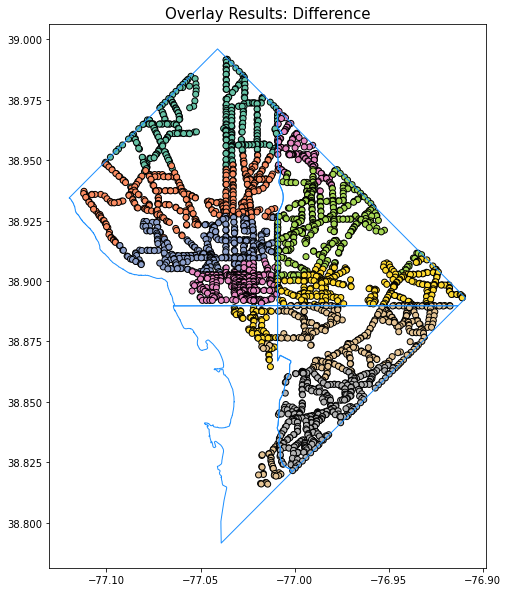

In [66]:
plot_overlay(overlay_type = "Difference", overlay_result = sector_squad)

In [67]:
quadrants

,EGIS_ID,REG_ID,BSTP_GEO_ID,index_right,Total_Below_average_income,Total_Above_average_income,Percentage,count_bus
QUADRANT,,,,,,,,
NE,1.059419e+09,8.156664e+08,8772972.0,83018.0,1385768.0,858671.0,-19628.389603,810.0
NW,1.874712e+09,1.439138e+09,16063814.0,145394.0,2159301.0,2606734.0,17848.733987,1433.0
SE,9.477495e+08,7.247550e+08,5109133.0,57001.0,1222532.0,442057.0,-35172.514367,724.0
SW,1.661188e+08,1.261703e+08,2211592.0,6702.0,164028.0,121164.0,-802.754786,126.0


In [68]:
quadrants = quadrants.reset_index()

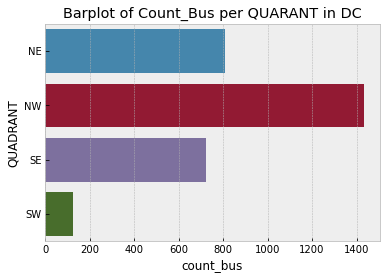

In [76]:
# Start your analysis here:

import seaborn as sns 

sns.barplot(data = quadrants, y = 'QUADRANT', x ='count_bus', ci = None)
plt.title('Barplot of Count_Bus per QUARANT in DC')
plt.show()

# Result
As we can tell from this barplot NW has the highest access to bustops
SW has the less access.